# FastDAG2PAG-python Example
This notebook demonstrates how to convert a DAG adjacency matrix with latent variables to a PAG.

In [1]:
import pandas as pd
from fastdag2pag.dag2pag import dag2pag
from fastdag2pag.Random_Graph import ErdosRenyi

## Construct a simple DAG adjacency matrix

In [2]:
num_nodes = 20
expected_degree = 2
ER_graph_gen = ErdosRenyi(num_nodes, expected_degree, def_dataframe=True, seed=321)
graph = ER_graph_gen.get_random_graph()
dag_df = ER_graph_gen.set_latent_nodes(graph, num_latent=3, selection_bias=False)

## Convert DAG to PAG using dag2pag

In [3]:
latent_variables = [node for node in dag_df.columns if node.startswith('L')]
result = dag2pag(dag_df, latent_nodes=latent_variables)
print('PAG Adjacency Matrix:')
print(result['PAG.DataFrame'])

PAG Adjacency Matrix:
     V1  V2  V3  V5  V6  V7  V9  V10  V12  V13  V14  V15  V16  V17  V18  V19  \
V1    0   0   0   0   0   0   0    0    0    0    0    2    0    0    0    2   
V2    0   0   0   0   0   0   0    0    0    0    2    0    2    1    1    2   
V3    0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
V5    0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    2   
V6    0   0   0   0   0   0   0    0    0    0    0    0    2    0    0    2   
V7    0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
V9    0   0   0   0   0   0   0    0    0    0    0    0    2    0    0    2   
V10   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
V12   0   0   0   0   0   0   0    0    0    1    2    0    0    0    0    2   
V13   0   0   0   0   0   0   0    0    1    0    2    0    0    0    0    2   
V14   0   1   0   0   0   0   0    0    1    1    0    0    0    0    0    2   
V15   1   0   0   

## View PAG object and DAG object

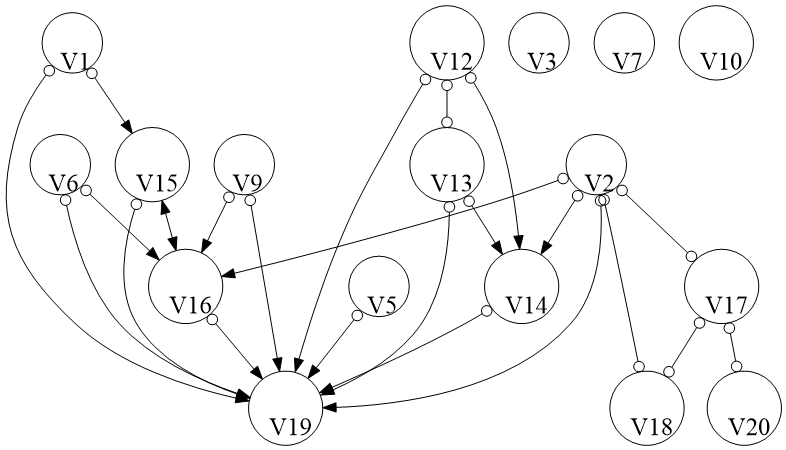

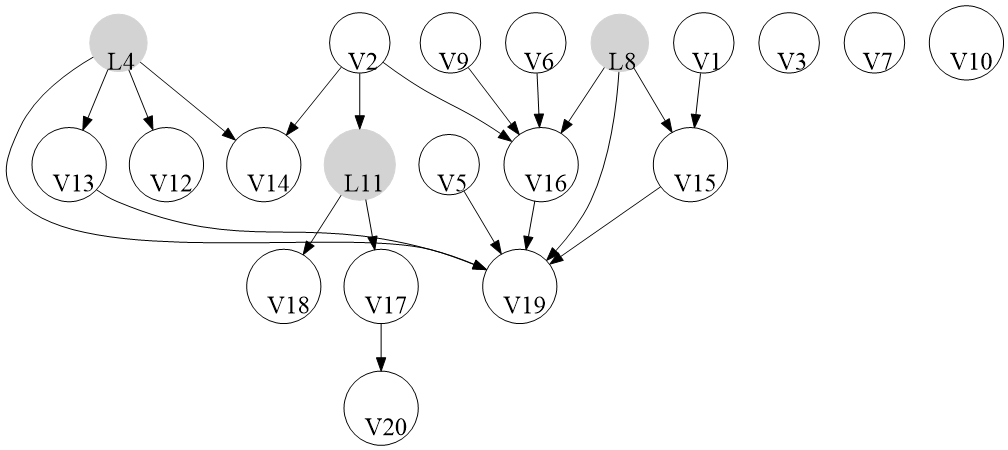

In [4]:
from IPython.display import Image, display

pag = result['PAG.MixGraph']
dag = result['DAG.MixGraph']
pag_pydot = pag.to_pydot()
png_bytes = pag_pydot.create_png()
display(Image(png_bytes))
dag_pydot = dag.to_pydot()
png_bytes = dag_pydot.create_png()
display(Image(png_bytes))

## Runtime Analysis

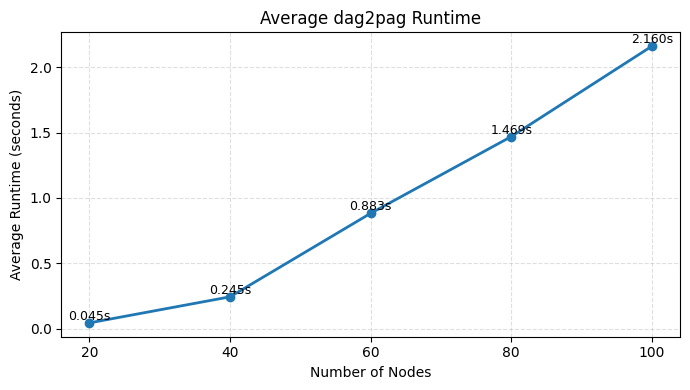

In [5]:

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fastdag2pag.dag2pag import dag2pag
from fastdag2pag.Random_Graph import ErdosRenyi

def test_speed(num_nodes, num_tests=5):
    times = []
    for _ in range(num_tests):
        dag = create_random_dag(num_nodes)
        start = time.perf_counter()
        pag = dag2pag(dag)
        end = time.perf_counter()
        times.append(end - start)
    return times

def create_random_dag(num_nodes):
    # Create a random DAG with the specified number of nodes
    ER_graph_gen = ErdosRenyi(num_nodes, expected_degree=3, def_dataframe=True, seed=321)
    graph = ER_graph_gen.get_random_graph()
    dag_df = ER_graph_gen.set_latent_nodes(graph, num_latent=3, selection_bias=False)
    return dag_df

node_counts = [20, 40, 60, 80, 100]
all_times = {}
for num_nodes in node_counts:
    times = test_speed(num_nodes)
    all_times[num_nodes] = times
means = [np.mean(all_times[n]) for n in node_counts]

plt.figure(figsize=(7,4))
plt.plot(node_counts, means, marker='o', linewidth=2, color='#1f77b4')
for x, y in zip(node_counts, means):
    plt.text(x, y, f'{y:.3f}s', ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Nodes')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average dag2pag Runtime')
plt.xticks(node_counts)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()
